In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [20]:
data.dropna()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


In [23]:
data = data.dropna()
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [24]:
split1 = int(len(data) * .6)
split2 = int(len(data) * .9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [25]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [50]:
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [51]:
import statsmodels.api as sm

In [52]:
model = sm.OLS(y_in, X_in)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        15:21:00   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529

# 4.) Recreate the graph fro your model

In [32]:
import matplotlib.pyplot as plt

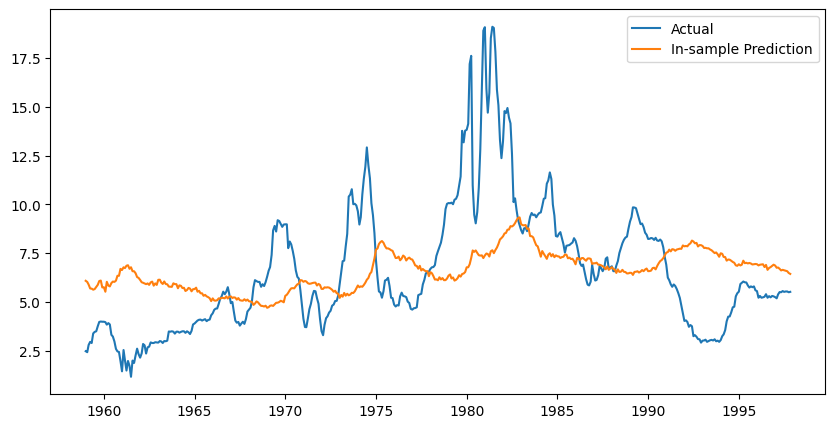

In [33]:
plt.figure(figsize=(10,5))
plt.plot(y_in.index, y_in, label='Actual')
plt.plot(y_in.index, y_pred_in, label='In-sample Prediction')
plt.legend()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse_in = mean_squared_error(y_in, y_pred_in)
mse_out = mean_squared_error(y_out, y_pred_out)

In [38]:
print("Insample MSE : ", mse_in)
print("Outsample MSE : ", mse_out)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
max_degrees = 3

In [48]:
poly = PolynomialFeatures(degree = degrees)
X_in_poly = poly.fit_transform(X_in)
X_out_poly = poly.fit_transform(X_out)

In [41]:
dir(poly)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_combinations',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_num_combinations',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'degree',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_metadata_routing',
 'get_params',
 'include_bias',
 'interaction_only',
 'order',
 'powers_',
 'set_ou

DEGREE :  1


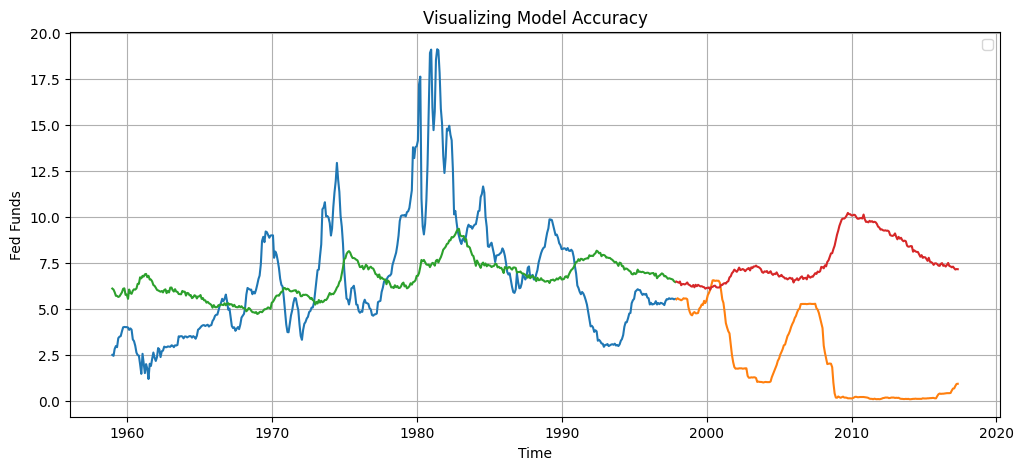

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835667884
DEGREE :  2


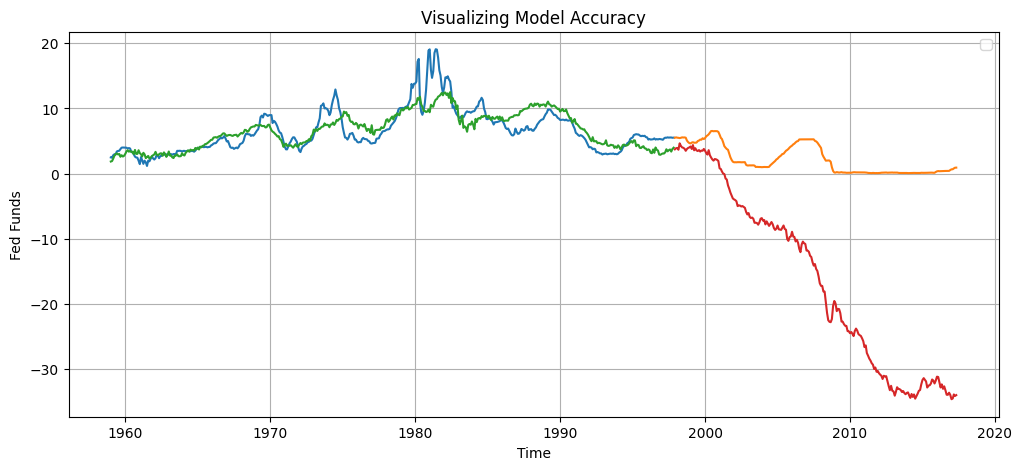

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099288752
DEGREE :  3


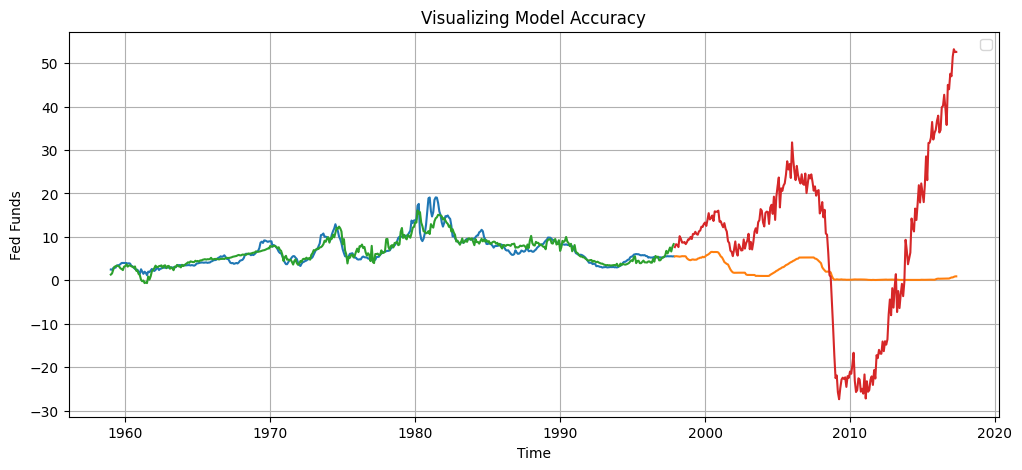

Insample MSE :  1.8723636271435131
Outsample MSE :  371.7675896854977


In [63]:
for degrees in range (1, max_degrees + 1):
    print ("DEGREE : ", degrees)
    poly = PolynomialFeatures(degree =degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    plt.figure(figsize = (12,5))
    
    pred_in = model1.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    
    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(data_in.index,model1.predict(X_in_poly))
    plt.plot(data_out.index,model1.predict(X_out_poly))
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

The consistent out-sample MSE across polynomial degrees 1, 2, and 3 suggests that increasing the complexity of the model (making the model more flexible) with higher-degree polynomials decreases in sample MSE, however, does not improve the model's predictive performance because the out sample MSE keeps on increasing which is sensitive to the training data noise. 